<a href="https://colab.research.google.com/github/Haritsmz/CO2_Emissions/blob/main/CO2_Emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dampak Jenis Bahan bakar terhadap Emisi CO2: Analisis Perbandingan Bahan Bakar Regular Gasoline, Premium Gasoline, Diesel and Ethanol**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# Feature selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.feature_selection import SelectKBest, f_regression

# Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Algoritma model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Model Saving
import joblib

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Loading Data**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/fuel_consumptions.csv')
df

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2024,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
1,2024,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6
2,2024,Acura,Integra Type S,Full-size,2.0,4,M6,Z,11.1,8.3,9.9,29,230,5,6
3,2024,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
4,2024,Acura,MDX SH-AWD Type S,Sport utility vehicle: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,2024,Volvo,V60 CC B5 AWD,Station wagon: Small,2.0,4,AS8,Z,10.0,7.5,8.9,32,207,5,5
760,2024,Volvo,V90 CC B6 AWD,Station wagon: Mid-size,2.0,4,AS8,Z,10.7,8.1,9.5,30,223,5,7
761,2024,Volvo,XC40 B5 AWD,Sport utility vehicle: Small,2.0,4,AS8,Z,9.9,7.8,9.0,31,210,5,5
762,2024,Volvo,XC60 B5 AWD,Sport utility vehicle: Small,2.0,4,AS8,Z,10.6,8.3,9.6,29,226,5,5


**Keterangan pada Dataset**

Transmission

*   A = Automatic
*   AM = Automated manual
*   AS = Automatic with select shift
*   AV = Continuously variable
*   M = Manual
*   3 - 10 = Number of gears

Fuel type

*   X = Regular gasoline
*   Z = Premium gasoline
*   D = Diesel
*   E = Ethanol (E85)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            764 non-null    int64  
 1   Make                  764 non-null    object 
 2   Model                 764 non-null    object 
 3   Vehicle class         764 non-null    object 
 4   Engine size (L)       764 non-null    float64
 5   Cylinders             764 non-null    int64  
 6   Transmission          764 non-null    object 
 7   Fuel type             764 non-null    object 
 8   City (L/100 km)       764 non-null    float64
 9   Highway (L/100 km)    764 non-null    float64
 10  Combined (L/100 km)   764 non-null    float64
 11  Combined (mpg)        764 non-null    int64  
 12  CO2 emissions (g/km)  764 non-null    int64  
 13  CO2 rating            764 non-null    int64  
 14  Smog rating           764 non-null    int64  
dtypes: float64(4), int64(6)

In [5]:
df.describe()

,Model year,Engine size (L),Cylinders,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
count,764.0,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,2024.0,3.078010,5.534031,12.395550,9.425393,11.060079,27.361257,258.920157,4.484293,5.494764
std,0.0,1.264461,1.892288,3.394191,2.307174,2.847954,7.718533,64.954103,1.305705,1.609677
min,2024.0,1.200000,3.000000,4.400000,4.400000,4.400000,11.000000,104.000000,1.000000,1.000000
25%,2024.0,2.000000,4.000000,10.100000,7.700000,9.000000,22.000000,210.000000,4.000000,5.000000
50%,2024.0,2.900000,6.000000,12.200000,9.300000,10.950000,26.000000,260.000000,4.000000,6.000000
75%,2024.0,3.600000,6.000000,14.500000,10.800000,12.725000,31.000000,299.000000,5.000000,7.000000
max,2024.0,8.000000,16.000000,30.300000,20.900000,26.100000,64.000000,608.000000,8.000000,8.000000


## Exploratory Data Analysis

**Data Cleansing**

In [6]:
# Drop Unnecesarry columns
df =df.drop(columns=df.iloc[:,8:10])

In [7]:
df = df.drop(columns=['Model year'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  764 non-null    object 
 1   Model                 764 non-null    object 
 2   Vehicle class         764 non-null    object 
 3   Engine size (L)       764 non-null    float64
 4   Cylinders             764 non-null    int64  
 5   Transmission          764 non-null    object 
 6   Fuel type             764 non-null    object 
 7   Combined (L/100 km)   764 non-null    float64
 8   Combined (mpg)        764 non-null    int64  
 9   CO2 emissions (g/km)  764 non-null    int64  
 10  CO2 rating            764 non-null    int64  
 11  Smog rating           764 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 71.8+ KB


**Replace Value**

In [9]:
# Replace values
unique_values = df['Transmission'].unique()

# Replace 'M' with 'Manual' and other unique values with 'Automatic'
a = np.where(np.isin(df['Transmission'], ['M5', 'M6', 'M7']), 'Manual', 'Automatic')

# Assign the modified values back to the 'Transmission' column
df['Transmission'] = a

print(df['Transmission'])

0      Automatic
1         Manual
2         Manual
3      Automatic
4      Automatic
         ...    
759    Automatic
760    Automatic
761    Automatic
762    Automatic
763    Automatic
Name: Transmission, Length: 764, dtype: object


In [10]:
# Replace fuel type
df['Fuel type']= df['Fuel type'].replace({'X' : 'Regular Gasoline', 'Z' : 'Premium Gasoline', 'D':'Diesel',
                                       'E':'Ethanol'})

In [11]:
df.sample(5)

,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
170,Chevrolet,Silverado FFV,Pickup truck: Standard,5.3,8,Automatic,Ethanol,17.7,16,293,4,5
144,Chevrolet,Blazer AWD,Sport utility vehicle: Small,3.6,6,Automatic,Regular Gasoline,11.2,25,262,4,6
364,Infiniti,QX50 AWD,Sport utility vehicle: Small,2.0,4,Automatic,Premium Gasoline,9.7,29,228,5,6
412,Kia,Sorento AWD,Sport utility vehicle: Small,2.5,4,Automatic,Regular Gasoline,10.3,27,241,5,7
744,Volkswagen,Golf GTI,Compact,2.0,4,Automatic,Regular Gasoline,8.8,32,204,5,5


**Unique Value**

In [12]:
df['Make'].unique()

array(['Acura', 'Alfa Romeo', 'Aston Martin', 'Audi', 'Bentley', 'BMW',
       'Bugatti', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge',
       'Ferrari', 'Ford', 'Genesis', 'GMC', 'Honda', 'Hyundai',
       'Infiniti', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land Rover',
       'Lexus', 'Lincoln', 'Maserati', 'Mazda', 'Mercedes-Benz', 'MINI',
       'Mitsubishi', 'Nissan', 'Porsche', 'Ram', 'Rolls-Royce', 'Subaru',
       'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [13]:
df['Vehicle class'].unique()

array(['Full-size', 'Sport utility vehicle: Small',
       'Sport utility vehicle: Standard', 'Mid-size', 'Minicompact',
       'Two-seater', 'Subcompact', 'Compact', 'Station wagon: Small',
       'Station wagon: Mid-size', 'Pickup truck: Small',
       'Pickup truck: Standard', 'Minivan'], dtype=object)

In [14]:
df['Fuel type'].unique()

array(['Premium Gasoline', 'Regular Gasoline', 'Diesel', 'Ethanol'],
      dtype=object)

In [15]:
df.sort_values(by='Engine size (L)')

,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
198,Chevrolet,Trailblazer,Sport utility vehicle: Small,1.2,3,Automatic,Regular Gasoline,7.8,36,183,6,7
571,Mitsubishi,Mirage,Compact,1.2,3,Automatic,Regular Gasoline,6.2,46,143,7,5
116,Buick,Envista,Station wagon: Small,1.2,3,Automatic,Regular Gasoline,7.9,36,185,6,7
203,Chevrolet,Trax,Station wagon: Small,1.2,3,Automatic,Regular Gasoline,7.9,36,185,6,7
200,Chevrolet,Trailblazer AWD,Sport utility vehicle: Small,1.3,3,Automatic,Regular Gasoline,8.6,33,204,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...
664,Rolls-Royce,Cullinan Black Badge,Station wagon: Mid-size,6.7,12,Automatic,Premium Gasoline,16.7,17,390,2,3
663,Rolls-Royce,Cullinan,Station wagon: Mid-size,6.7,12,Automatic,Premium Gasoline,16.7,17,390,2,3
669,Rolls-Royce,Phantom Extended,Full-size,6.7,12,Automatic,Premium Gasoline,17.0,17,397,2,3
668,Rolls-Royce,Phantom,Full-size,6.7,12,Automatic,Premium Gasoline,17.0,17,397,2,3


In [16]:
df['Cylinders'].unique()

array([ 4,  6,  8, 12, 16,  3, 10])

In [17]:
df.sort_values(by='Combined (L/100 km)')

,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
408,Kia,Niro FE,Sport utility vehicle: Small,1.6,4,Automatic,Regular Gasoline,4.4,64,104,8,7
344,Hyundai,Elantra Hybrid,Mid-size,1.6,4,Automatic,Regular Gasoline,4.7,60,110,8,7
697,Toyota,Corolla Hybrid,Compact,1.8,4,Automatic,Regular Gasoline,4.7,60,110,8,7
407,Kia,Niro,Sport utility vehicle: Small,1.6,4,Automatic,Regular Gasoline,4.8,59,112,8,7
720,Toyota,Prius AWD,Mid-size,2.0,4,Automatic,Regular Gasoline,4.8,59,111,8,7
...,...,...,...,...,...,...,...,...,...,...,...,...
302,GMC,Sierra 4WD Mud Terrain Tire FFV,Pickup truck: Standard,5.3,8,Automatic,Ethanol,19.2,15,318,3,5
253,Ford,F-150 Raptor R 4X4,Pickup truck: Standard,5.2,8,Automatic,Regular Gasoline,19.7,14,460,1,5
662,Ram,1500 4X4 TRX,Pickup truck: Standard,6.2,8,Automatic,Premium Gasoline,19.8,14,465,1,1
515,Mercedes-Benz,AMG G 63 4x4 Squared SUV,Sport utility vehicle: Standard,4.0,8,Automatic,Premium Gasoline,21.7,13,508,1,3


In [18]:
df.sort_values(by='Combined (mpg)')

,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
111,Bugatti,Chiron Super Sport,Two-seater,8.0,16,Automatic,Premium Gasoline,26.1,11,608,1,1
515,Mercedes-Benz,AMG G 63 4x4 Squared SUV,Sport utility vehicle: Standard,4.0,8,Automatic,Premium Gasoline,21.7,13,508,1,3
662,Ram,1500 4X4 TRX,Pickup truck: Standard,6.2,8,Automatic,Premium Gasoline,19.8,14,465,1,1
253,Ford,F-150 Raptor R 4X4,Pickup truck: Standard,5.2,8,Automatic,Regular Gasoline,19.7,14,460,1,5
215,Ferrari,Purosangue,Sport utility vehicle: Standard,6.5,12,Automatic,Premium Gasoline,19.0,15,442,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
407,Kia,Niro,Sport utility vehicle: Small,1.6,4,Automatic,Regular Gasoline,4.8,59,112,8,7
720,Toyota,Prius AWD,Mid-size,2.0,4,Automatic,Regular Gasoline,4.8,59,111,8,7
344,Hyundai,Elantra Hybrid,Mid-size,1.6,4,Automatic,Regular Gasoline,4.7,60,110,8,7
697,Toyota,Corolla Hybrid,Compact,1.8,4,Automatic,Regular Gasoline,4.7,60,110,8,7


## **Visualization**

**Analysis Univariate**

In [19]:
df[['Fuel type']].value_counts()

Fuel type       
Premium Gasoline    409
Regular Gasoline    331
Diesel               18
Ethanol               6
Name: count, dtype: int64

<ipython-input-20-07be46fd483f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cars_model.index, y=top_10_cars_model.values, palette='dark')


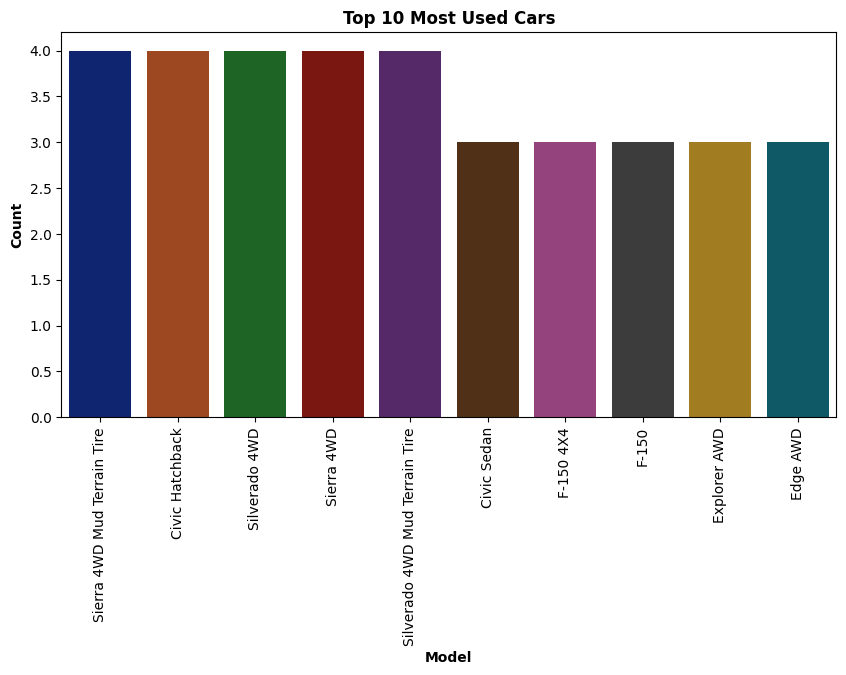

In [20]:
# Bar plot for the most used car
top_10_cars_model = df['Model'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_cars_model.index, y=top_10_cars_model.values, palette='dark')
plt.title('Top 10 Most Used Cars', fontsize = 'large', fontweight = 'bold')
plt.xlabel('Model', fontsize = 'medium', fontweight = 'bold')
plt.ylabel('Count', fontsize = 'medium', fontweight = 'bold')
plt.xticks(rotation=90)
plt.show()


<ipython-input-21-373f14985070>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)
<ipython-input-21-373f14985070>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=make.index, x=make.values, palette='magma')
<ipython-input-21-373f14985070>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=vehicle_class.index, x=vehicle_class.values, palette='magma')
<ipython-input-21-373f14985070>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` 

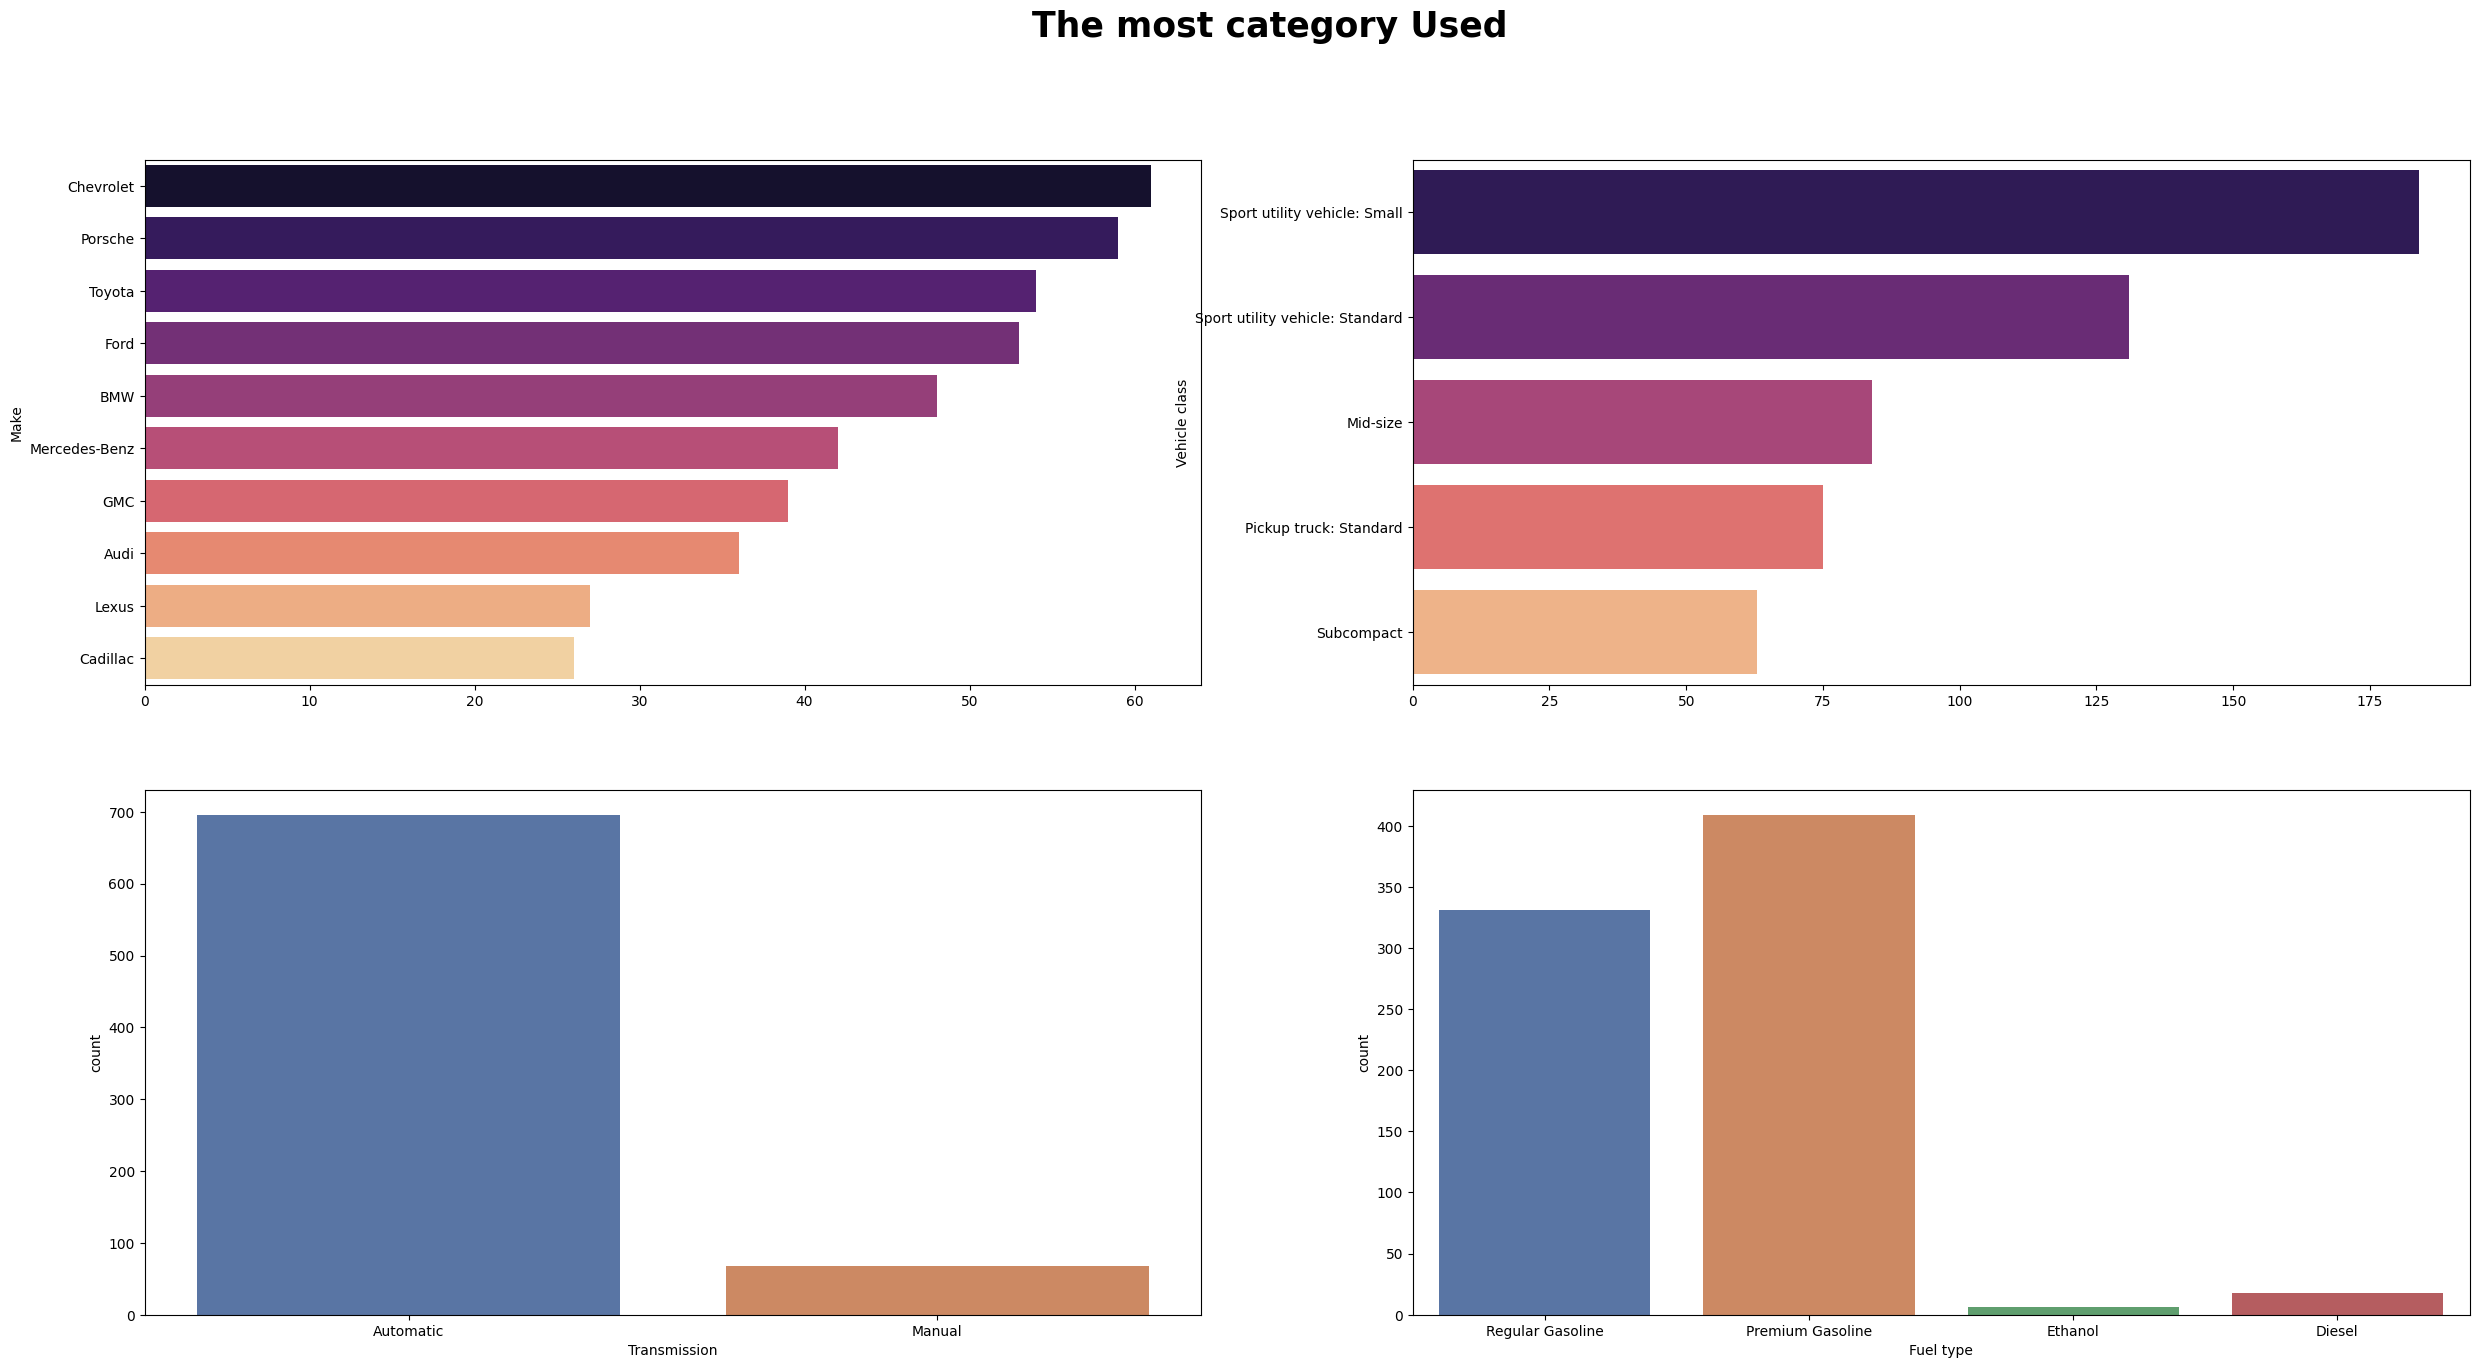

In [21]:
# Sort the DataFrame by count of Brand and Vehicle Class
make = df['Make'].value_counts().sort_values(ascending=False).head(10)
vehicle_class = df['Vehicle class'].value_counts().sort_values(ascending=False).head(5)

# Visualize
plt.subplots(figsize=(30,15))
plt.suptitle('The most category Used', fontsize = 25, fontweight = 'bold')

# Create the bar plot
plt.subplot(221)
sns.barplot(y=make.index, x=make.values, palette='magma')

plt.subplot(222)
sns.barplot(y=vehicle_class.index, x=vehicle_class.values, palette='magma')

plt.subplot(223)
sns.countplot(df, x=df['Transmission'], palette='deep')

plt.subplot(224)
sns.countplot(df, x=df['Fuel type'].sort_values(ascending=False), palette='deep')

plt.show()

Dari visualisasi diatas dapat dilihat bahwa:

*   Brand mobil yang paling banyak digunakan adalah **Chevrolet** diikuti oleh **Porsche, Toyota, Ford, BMW, dll**
*   Berdasarkan jenisnya mobil yang paling banyak digunakan adalah **Sport Utility Vehiche: Small**, **Sport Utility Vehiche: Standard**, **Mid-size**, **Pickup Truck: Standard**, dan **Subcompact**
*   Pengguna mobil lebih banyak menggunakan mobil dengan transmisi Automatic
*   Jenis bahan bakar yang paling banyak digunakan adalah **Regular Gasoline**, **Premium Gasoline**, **Diesel**, dan **Ethanol**



**Analysis Bivariate**

<ipython-input-22-c498b1e40825>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df, x=df['Fuel type'], y=df['CO2 emissions (g/km)'], palette='deep')


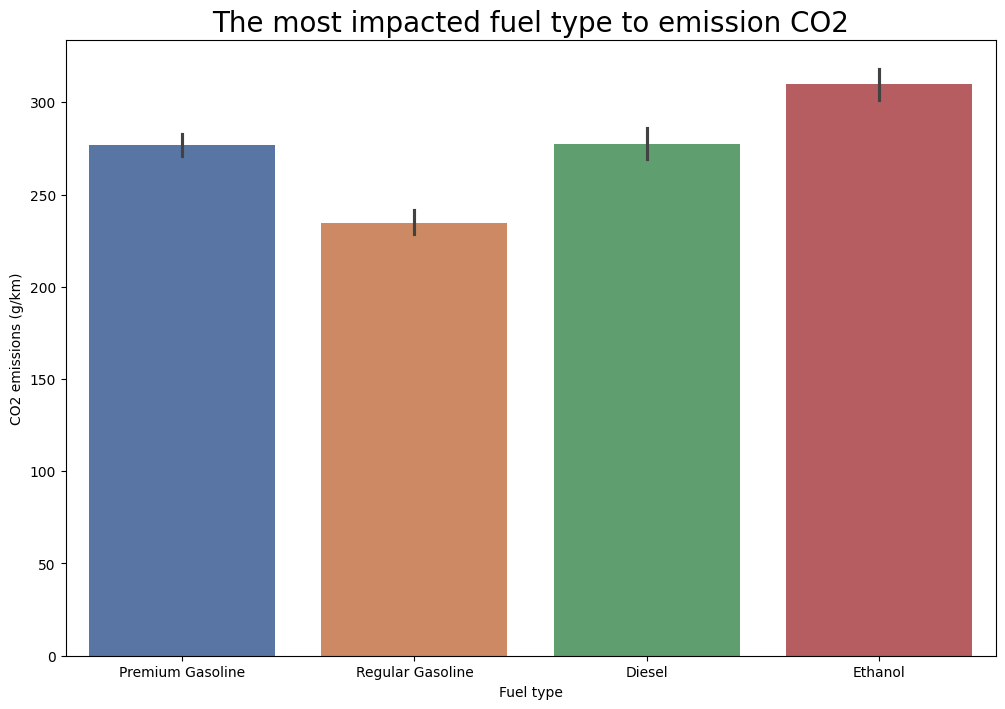

In [22]:
plt.figure(figsize=(12,8))
sns.barplot(df, x=df['Fuel type'], y=df['CO2 emissions (g/km)'], palette='deep')
plt.title('The most impacted fuel type to emission CO2', fontsize=20)
plt.show()

In [23]:
df.groupby(['Fuel type'])[['CO2 emissions (g/km)']].mean().sort_values(by='CO2 emissions (g/km)',ascending=False)

,CO2 emissions (g/km)
Fuel type,
Ethanol,309.666667
Diesel,277.500000
Premium Gasoline,276.955990
Regular Gasoline,234.703927


Berdasarkan jenis bahan bakar, rata-rata emisi yang dihasilkan paling banyak oleh bahan bakar Ethanol dan yang paling sedikit adalah Regular Gasoline

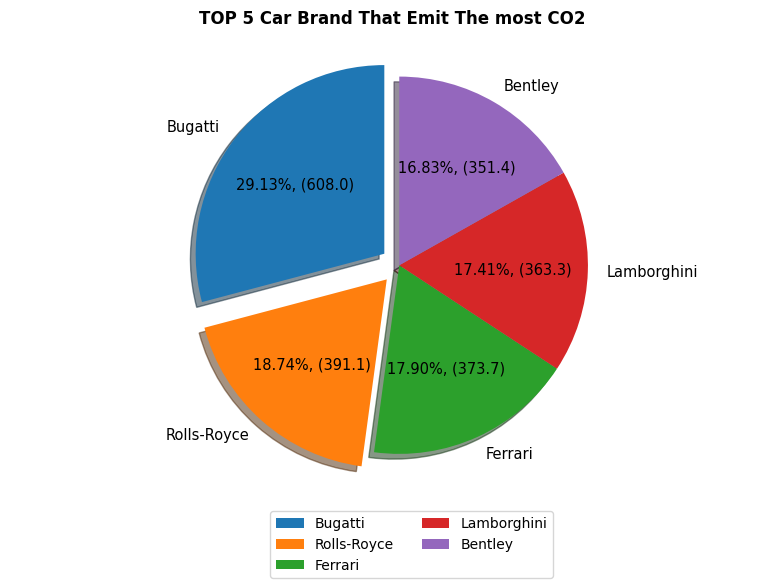

In [24]:
top5_brand = df.groupby(df['Make'])[['CO2 emissions (g/km)']].mean().sort_values(by='CO2 emissions (g/km)', ascending=False).head(5)
top_5 = top5_brand.index.tolist()
co2_emissions = top5_brand['CO2 emissions (g/km)'].tolist()


plt.figure(figsize=(8,6))
plt.pie(co2_emissions,
        labels=top_5,
        shadow=True,
        explode=[0.1, 0.1, 0, 0, 0],
        autopct=lambda p:f'{p:.2f}%, ({p*sum(co2_emissions)/100 :.1f})',
        textprops={"fontsize": 10.5},
        startangle=90)


plt.title("TOP 5 Car Brand That Emit The most CO2", fontsize = "large", fontweight = "bold", y = 1.03)
plt.legend(top_5, ncol = 2, loc="best", bbox_to_anchor=(0.72, -0.04), fontsize = 'medium')

plt.axis("equal")
plt.tight_layout()
plt.show()

In [25]:
df.groupby(df['Make'])[['CO2 emissions (g/km)']].mean().sort_values(by=['CO2 emissions (g/km)'], ascending=False).head()

,CO2 emissions (g/km)
Make,
Bugatti,608.000000
Rolls-Royce,391.142857
Ferrari,373.666667
Lamborghini,363.333333
Bentley,351.375000


5 Brand mobil yang paling banyak menyumbangkan emisi CO2 adalah **Bugatti**, **Rolls-Royce**, **Ferrari**, **Lamborghini** dan **Bentley**. Kelima brand tersebut merupakan hypercar dengan Engine Size yang sangat besar dan jumlah silinder yang banyak, sehingga hal tersebut merupakan salah satu data pendukung yang menyebabkan semakin besarnya emisi CO2 yang dihasilkan

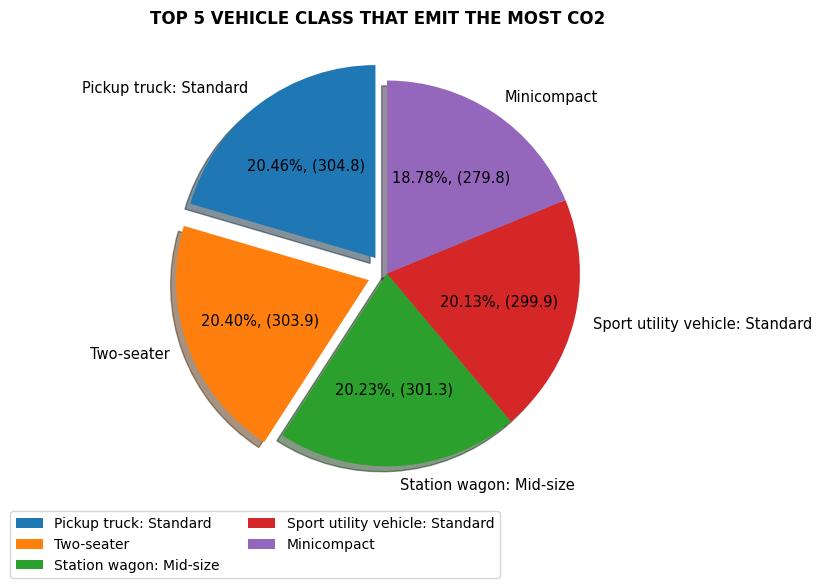

In [26]:
top_5 = df.groupby(df['Vehicle class'])[['CO2 emissions (g/km)']].mean().sort_values(by='CO2 emissions (g/km)', ascending=False).head(5)
top_classes = top_5.index.tolist()
co2_emissions = top_5['CO2 emissions (g/km)'].tolist()


plt.figure(figsize=(8,6))
plt.pie(co2_emissions,
        labels=top_classes,
        shadow=True,
        explode=[0.1, 0.1, 0, 0, 0],
        autopct=lambda p:f'{p:.2f}%, ({p*sum(co2_emissions)/100 :.1f})',
        textprops={"fontsize": 10.5},
        startangle=90)


plt.title("TOP 5 VEHICLE CLASS THAT EMIT THE MOST CO2", fontsize = "large", fontweight = "bold", y = 1.03)
plt.legend(top_classes, ncol = 2, loc = "best", bbox_to_anchor=(0.72, -0.04), fontsize = 'medium')

plt.axis("equal")
plt.tight_layout()
plt.show()

In [27]:
df.groupby(df['Vehicle class'])[['CO2 emissions (g/km)']].mean().sort_values(by=['CO2 emissions (g/km)'], ascending=False).head()

,CO2 emissions (g/km)
Vehicle class,
Pickup truck: Standard,304.840000
Two-seater,303.918367
Station wagon: Mid-size,301.333333
Sport utility vehicle: Standard,299.862595
Minicompact,279.775510


5 Jenis mobil yang paling banyak menyumbang emisi gas CO2 adalah **Pickup truck: Standard**, **Two-seater**, **Station wagon: Mid-size**, **Sport utility vehicle: Standard**, dan **Minicompact**

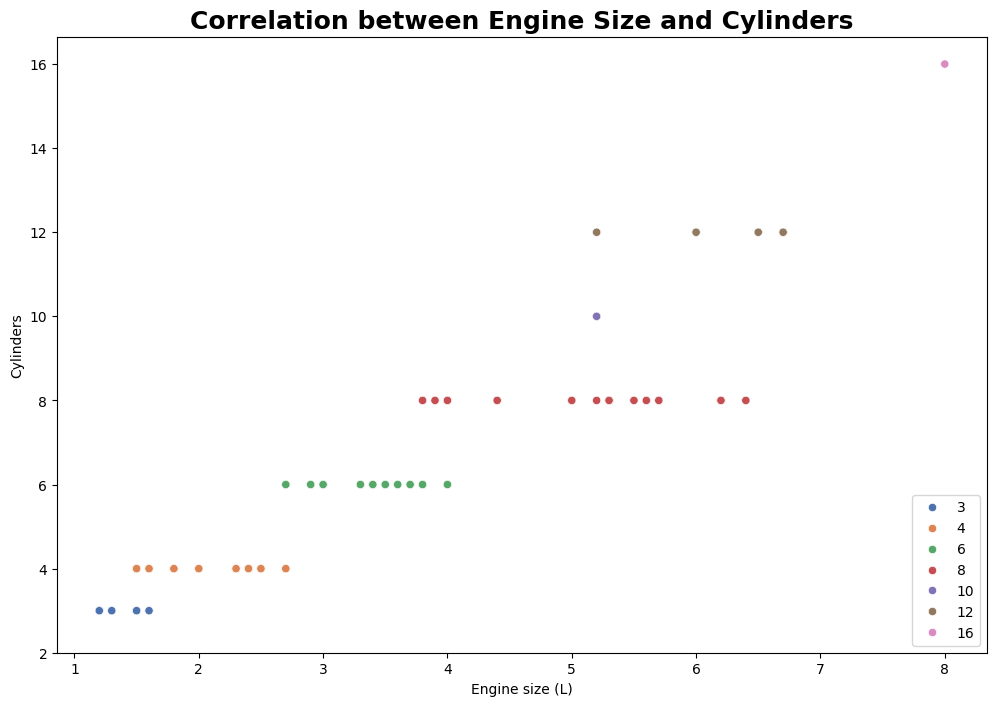

In [28]:
plt.figure(figsize=(12,8))
sns.scatterplot(df, x=df['Engine size (L)'], y=df['Cylinders'], hue='Cylinders', palette='deep')
plt.ylim(2,)
plt.title('Correlation between Engine Size and Cylinders', fontsize=18, fontweight='bold')
plt.legend(loc='lower right')
plt.show()

Dari visualisasi diatas dapat dilihat bahwa semakin besar **Engine Size** maka **jumlah Cylinders** akan semakin banyak, hal ini karena mesin dengan cc yang lebih besar memiliki lebih banyak ruang pembakaran, sehingga dibutuhkan jumlah silinder yang lebih banyak untuk menyempurnakan pembakaran.

<ipython-input-29-3e5a221176db>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


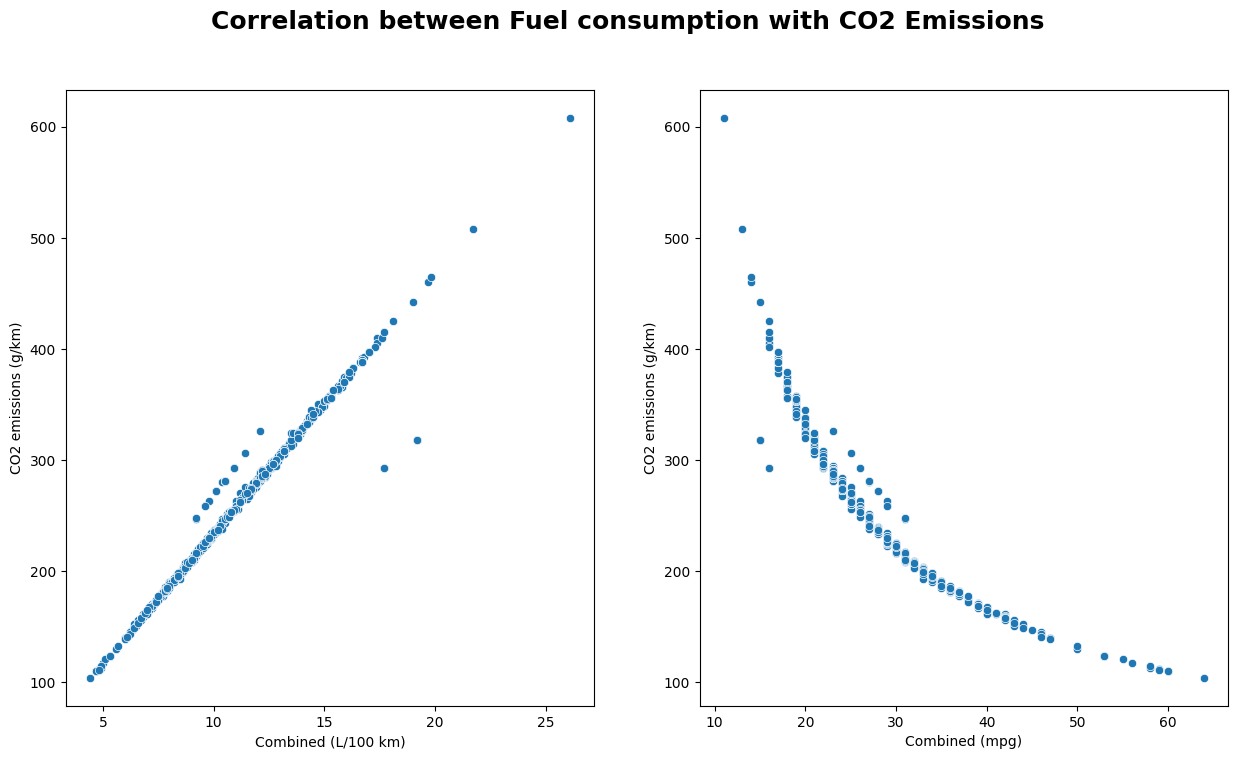

In [29]:
# Correlation between fuel consumption

plt.subplots(figsize=(15,8))

plt.subplot(121)
sns.scatterplot(df, x=df['Combined (L/100 km)'], y=df['CO2 emissions (g/km)'])

plt.subplot(122)
sns.scatterplot(df, x=df['Combined (mpg)'], y=df['CO2 emissions (g/km)'])

plt.suptitle('Correlation between Fuel consumption with CO2 Emissions', fontsize=18, fontweight='bold')
plt.show()

Dari visualisasi diatas dapat kita lihat bahwa :

Gambar Sebelah Kiri:

*   Menunjukkan hubungan positif antara konsumsi bahan bakar (L/100km) dan emisi CO2 (g/km).
*   Artinya: Semakin banyak bahan bakar yang dibakar, semakin banyak emisi CO2 yang dihasilkan.

Gambar Sebelah Kanan:

*   Menunjukkan hubungan negatif antara konsumsi bahan bakar (mpg) dan emisi CO2 (g/km).
*   Artinya: Semakin irit bahan bakar mobil (mpg tinggi), semakin sedikit emisi CO2 yang dihasilkan per kilometer.


**Analysis Multivariate**

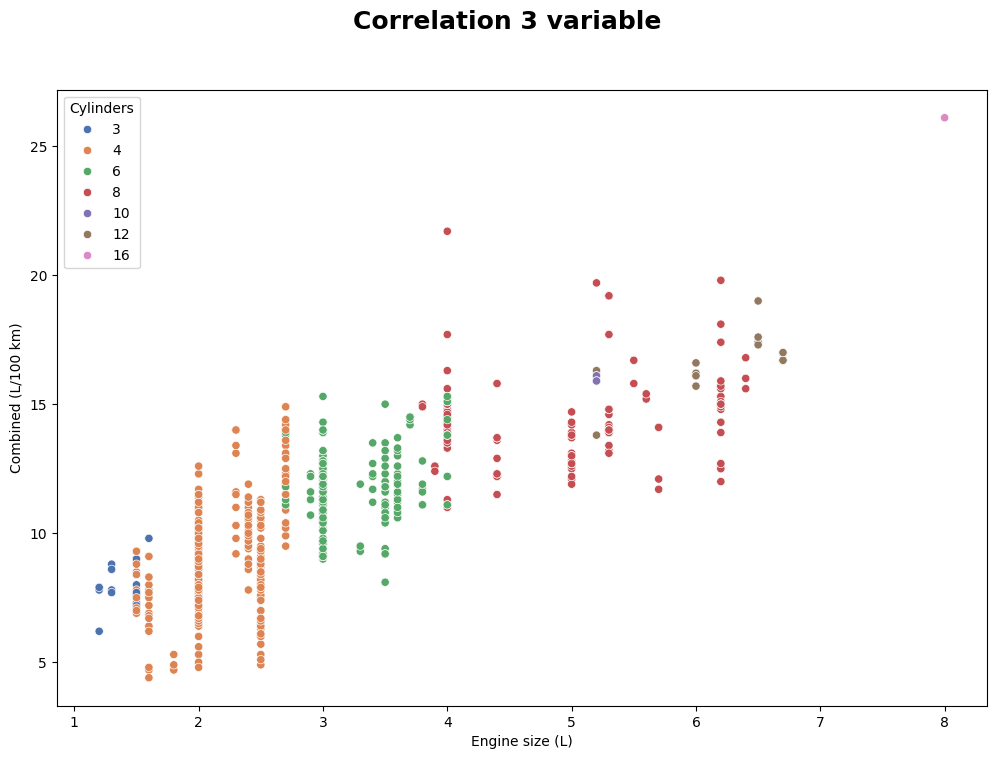

In [30]:
plt.figure(figsize=(12,8))
sns.scatterplot(df, y=df['Combined (L/100 km)'], x=df['Engine size (L)'], hue='Cylinders', palette='deep')
plt.suptitle('Correlation 3 variable', fontsize=18, fontweight='bold')
plt.show()

Dari gambar diatas dapat kita lihat bahwa besar nya kapasitas mesin (Engine Size (L)) dan banyaknya silinder akan mempengaruhi jumlah konsumsi bahan bakar pada mobil.

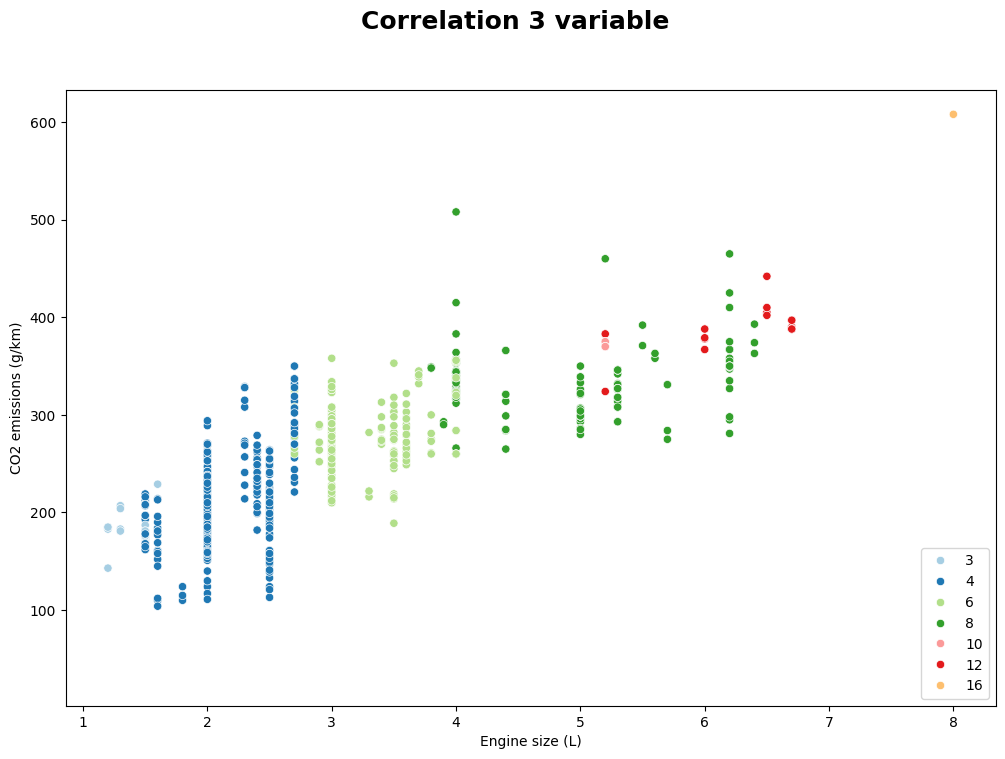

In [31]:
plt.figure(figsize=(12,8))
sns.scatterplot(df, x=df['Engine size (L)'], y=df['CO2 emissions (g/km)'], hue='Cylinders', palette='Paired')
plt.ylim(2,)
plt.legend(loc='lower right')
plt.suptitle('Correlation 3 variable', fontsize=18, fontweight='bold')
plt.show()


Dari gambar diatas dapat kita lihat bahwa semakin besar **Engine Size** dan semakin banyak **silinder** pada mesin maka emisi yang dihasilkan juga akan semakin meningkat.

## **Uji Hipotesis Testing**

**Hipotesis Nol (H0): Tidak ada perbedaan signifikan dalam emisi CO2 antara jenis bahan bakar.** \\
**Hipotesis Alternatif (H1): Ada perbedaan signifikan dalam emisi CO2 antara jenis bahan bakar.** \\
Critical Value = 0.05 \\
Jika P-Value < Critical Value : H1 diterima, jika P-value > Critical Value Maka H1 Ditolak


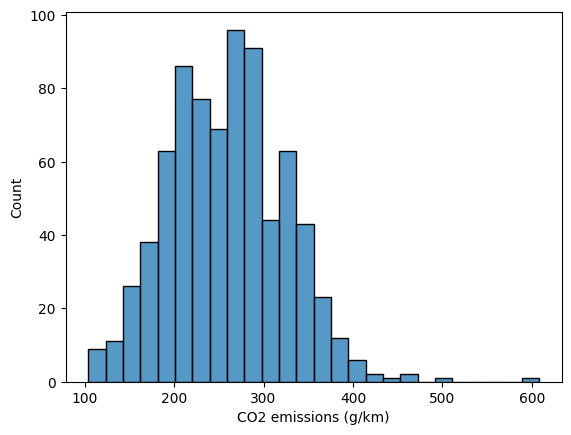

0.39114328194131354


In [32]:
# Distribution Data of CO2 Emissions
sns.histplot(df, x=df['CO2 emissions (g/km)'])
plt.show()

print(df['CO2 emissions (g/km)'].skew())

In [33]:
# Mean of CO2 Emissions
df['CO2 emissions (g/km)'].mean()

258.92015706806285

In [34]:
df.groupby(df['Fuel type'])[['CO2 emissions (g/km)']].mean()

,CO2 emissions (g/km)
Fuel type,
Diesel,277.500000
Ethanol,309.666667
Premium Gasoline,276.955990
Regular Gasoline,234.703927


In [35]:
from scipy.stats import f_oneway

bensin_regular = df[df['Fuel type'] == 'Regular Gasoline']['CO2 emissions (g/km)']
bensin_premium = df[df['Fuel type'] == 'Premium Gasoline']['CO2 emissions (g/km)']
diesel = df[df['Fuel type'] == 'Diesel']['CO2 emissions (g/km)']
etanol = df[df['Fuel type'] == 'Ethanol']['CO2 emissions (g/km)']

In [36]:
# Melakukan uji ANOVA
stat, p_value = f_oneway(bensin_regular, bensin_premium, diesel, etanol)

# Menampilkan hasil
print('Hasil Uji ANOVA:')
print('Nilai F-statistic:', stat)
print('Nilai P-value:', p_value)

Hasil Uji ANOVA:
Nilai F-statistic: 30.78650285107447
Nilai P-value: 8.656012957636883e-19


Nilai P-Value sebesar **$8.65^{-19}$**. Hal ini menunjukkan bahwa P-Value < Critical Value, sehingga H1 **diterima**.
Jadi dapat disimpulkan bahwa terdapat perbedaan signifikan antara jenis bahan bakar dalam emisi CO2.

## Data Preprocessing

**Handling Missing Value**

In [37]:
# missing value
df.isna().sum()

Make                    0
Model                   0
Vehicle class           0
Engine size (L)         0
Cylinders               0
Transmission            0
Fuel type               0
Combined (L/100 km)     0
Combined (mpg)          0
CO2 emissions (g/km)    0
CO2 rating              0
Smog rating             0
dtype: int64

In [38]:
#split inference
data_inf = df.sample(13, random_state=23)
data_train_test = df.drop(data_inf.index)

In [39]:
X = data_train_test.drop(columns=(['CO2 emissions (g/km)']))
y = data_train_test['CO2 emissions (g/km)']

X.head()

,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,Combined (L/100 km),Combined (mpg),CO2 rating,Smog rating
0,Acura,Integra A-SPEC,Full-size,1.5,4,Automatic,Premium Gasoline,7.4,38,6,7
1,Acura,Integra A-SPEC,Full-size,1.5,4,Manual,Premium Gasoline,7.8,36,6,6
2,Acura,Integra Type S,Full-size,2.0,4,Manual,Premium Gasoline,9.9,29,5,6
3,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,Automatic,Premium Gasoline,11.2,25,4,5
4,Acura,MDX SH-AWD Type S,Sport utility vehicle: Standard,3.0,6,Automatic,Premium Gasoline,12.4,23,4,5


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=77)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (600, 11)
Test Size  :  (151, 11)


**Handling Outlier**

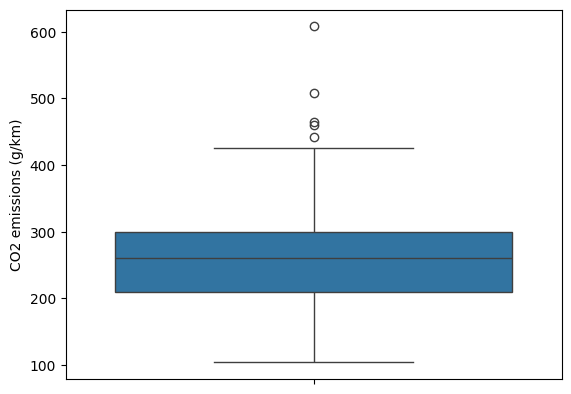

0.1317732701778923


In [41]:
sns.boxplot(data_train_test, y=df['CO2 emissions (g/km)'])
plt.show()

print(y_train.skew())

Nilai skewness data sudah cukup baik sehingga tidak perlu dilakukan handling outliers.

**Numeric Data**

In [42]:
num_column = data_train_test.select_dtypes(include=['int64','float64']).columns.tolist()

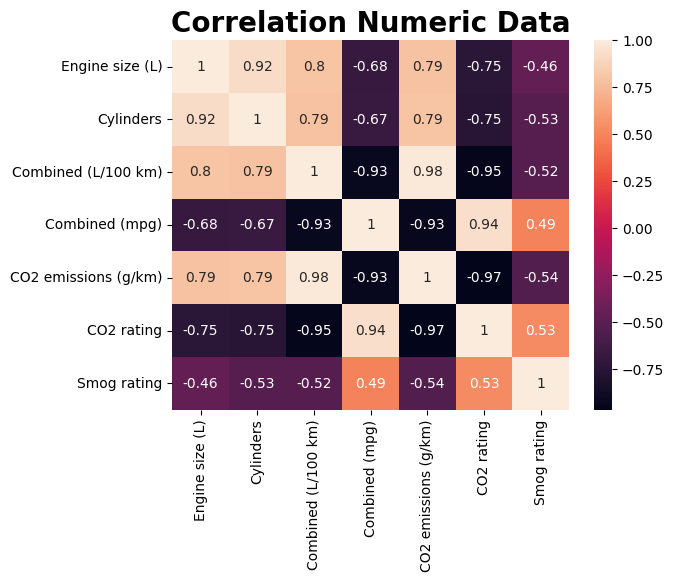

In [43]:
sns.heatmap(data_train_test[num_column].corr(), annot=True)
plt.title('Correlation Numeric Data', fontsize=20, fontweight='bold')
plt.show()

**Categorical Data**

In [44]:
cat_column = df.select_dtypes(include='object').columns.tolist()

In [45]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

df_cat = data_train_test[cat_column].apply(LabelEncoder().fit_transform)
df_cat

,Make,Model,Vehicle class,Transmission,Fuel type
0,0,318,1,0,2
1,0,318,1,1,2
2,0,319,1,1,2
3,0,363,7,0,2
4,0,364,8,0,2
...,...,...,...,...,...
758,38,472,2,0,2
759,38,551,10,0,2
760,38,552,9,0,2
761,38,585,7,0,2


In [46]:
anova = SelectKBest(score_func=f_regression, k=4)
anova.fit_transform(df_cat,data_train_test['CO2 emissions (g/km)'])

anova_score = pd.DataFrame({'Anova_score':anova.scores_, 'P_value_anova': anova.pvalues_}, index=cat_column )
anova_score.sort_values(by=['P_value_anova'], ascending=True)

,Anova_score,P_value_anova
Fuel type,69.441665,3.747531e-16
Vehicle class,48.175524,8.449557e-12
Make,32.003176,2.190964e-08
Model,0.833423,3.615783e-01
Transmission,0.003461,9.530998e-01


Data **Model & Transmission** memiliki nilai p-value > 0.05 sehingga perlu dilakukan penghapusan pada feature **Model & Transmission**.

## Scalling dan Encoding

In [47]:
num = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
cat = ['Make', 'Vehicle class', 'Fuel type']

In [48]:
# Separate 2 types of data

X_train_final = X_train[num+cat]
X_test_final = X_test[num+cat]

X_train_final.reset_index(drop=True, inplace=True)
X_test_final.reset_index(drop=True, inplace=True)

In [49]:
preprocessor = ColumnTransformer(transformers=
    [('numerical',MinMaxScaler(), num),
    ('categorical', OrdinalEncoder(), cat)]
)
preprocessor

ColumnTransformer(transformers=[('numerical', MinMaxScaler(),
                                 ['Engine size (L)', 'Cylinders',
                                  'Combined (L/100 km)', 'Combined (mpg)',
                                  'CO2 rating', 'Smog rating']),
                                ('categorical', OrdinalEncoder(),
                                 ['Make', 'Vehicle class', 'Fuel type'])])

## **Model Definition**

In [50]:
# Definition 4 model
lr = LinearRegression()
rf = RandomForestRegressor(random_state=77)
gb = GradientBoostingRegressor()
knn = KNeighborsRegressor()

In [51]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat),
        ('num', numerical_transformer, num)
    ])

In [52]:
# model training using pipeline
pipeline_lr = Pipeline(
    steps=[("preprocessor", preprocessor), ("lr", lr)])

pipeline_rf = Pipeline(
    steps=[('preprcosseor', preprocessor), ('rf', rf)])

pipeline_gb = Pipeline(
    steps=[('preprcosseor', preprocessor), ('gb', gb)])

pipeline_knn = Pipeline(
    steps=[('preprocessor', preprocessor), ('knn', knn)])

In [53]:
pipeline_lr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Make', 'Vehicle class',
                                                   'Fuel type']),
                                                 ('num', StandardScaler(),
                                                  ['Engine size (L)',
                                                   'Cylinders',
                                                   'Combined (L/100 km)',
                                                   'Combined (mpg)',
                                                   'CO2 rating',
                                                   'Smog rating'])])),
                ('lr', LinearRegression())])

In [54]:
pipeline_rf

Pipeline(steps=[('preprcosseor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Make', 'Vehicle class',
                                                   'Fuel type']),
                                                 ('num', StandardScaler(),
                                                  ['Engine size (L)',
                                                   'Cylinders',
                                                   'Combined (L/100 km)',
                                                   'Combined (mpg)',
                                                   'CO2 rating',
                                                   'Smog rating'])])),
                ('rf', RandomForestRegressor(random_state=77))])

## **Model Training**

In [55]:
pipeline_lr.fit(X_train_final,y_train)
pipeline_rf.fit(X_train_final,y_train)
pipeline_gb.fit(X_train_final,y_train)
pipeline_knn.fit(X_train_final,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Make', 'Vehicle class',
                                                   'Fuel type']),
                                                 ('num', StandardScaler(),
                                                  ['Engine size (L)',
                                                   'Cylinders',
                                                   'Combined (L/100 km)',
                                                   'Combined (mpg)',
                                                   'CO2 rating',
                                                   'Smog rating'])])),
                ('knn', KNeighborsRegressor())])

In [56]:
# predict model
lr_pred_train = pipeline_lr.predict(X_train_final)
lr_pred_test = pipeline_lr.predict(X_test_final)

rf_pred_train = pipeline_rf.predict(X_train_final)
rf_pred_test = pipeline_rf.predict(X_test_final)

gb_pred_train = pipeline_gb.predict(X_train_final)
gb_pred_test = pipeline_gb.predict(X_test_final)

knn_pred_train = pipeline_knn.predict(X_train_final)
knn_pred_test = pipeline_knn.predict(X_test_final)

## **Model Evaluation**

In [57]:
all_reports= {}
score1 = {
        'Linear Regression -Trein'   : round(r2_score(lr_pred_train,y_train), 2),
        'Linear Regression -Test'    : round(r2_score(lr_pred_test, y_test), 2),
        'Random Forest -Train'       : round(r2_score(rf_pred_train,y_train),2),
        'Random Forest -Test'        : round(r2_score(rf_pred_test,y_test),2),
        'GradientBoosting -Train'    : round(r2_score(gb_pred_train,y_train),2),
        'GradientBoosting -Test'     : round(r2_score(gb_pred_test,y_test),2),
        'KNeighborsRegressor -Train' : round(r2_score(knn_pred_train,y_train ),2),
        'KNeighborsRegressor -Test' : round(r2_score(knn_pred_test,y_test ),2)
}
all_reports['R2score'] = score1

a = pd.DataFrame(all_reports)

In [58]:
score2 = {
        'Linear Regression -Trein'   : round(mean_absolute_error(lr_pred_train,y_train), 2),
        'Linear Regression -Test'    : round(mean_absolute_error(lr_pred_test, y_test), 2),
        'Random Forest -Train'       : round(mean_absolute_error(rf_pred_train,y_train),2),
        'Random Forest -Test'        : round(mean_absolute_error(rf_pred_test,y_test),2),
        'GradientBoosting -Train'    : round(mean_absolute_error(gb_pred_train,y_train),2),
        'GradientBoosting -Test'     : round(mean_absolute_error(gb_pred_test,y_test),2),
        'KNeighborsRegressor -Train' : round(mean_absolute_error(knn_pred_train,y_train ),2),
        'KNeighborsRegressor -Test' : round(mean_absolute_error(knn_pred_test,y_test ),2)
}
all_reports['MAE'] = score2

b = pd.DataFrame(all_reports)

In [59]:
# RMSE
score3 = {
        'Linear Regression -Trein'   : round(np.sqrt(mean_squared_error(lr_pred_train,y_train)), 2),
        'Linear Regression -Test'    : round(np.sqrt(mean_squared_error(lr_pred_test, y_test)), 2),
        'Random Forest -Train'       : round(np.sqrt(mean_squared_error(rf_pred_train,y_train)),2),
        'Random Forest -Test'        : round(np.sqrt(mean_squared_error(rf_pred_test,y_test)),2),
        'GradientBoosting -Train'    : round(np.sqrt(mean_squared_error(gb_pred_train,y_train)),2),
        'GradientBoosting -Test'     : round(np.sqrt(mean_squared_error(gb_pred_test,y_test)),2),
        'KNeighborsRegressor -Train' : round(np.sqrt(mean_squared_error(knn_pred_train,y_train)),2),
        'KNeighborsRegressor -Test' : round(np.sqrt(mean_squared_error(knn_pred_test,y_test)),2)
}
all_reports['RMSE'] = score3

c = pd.DataFrame(all_reports)

In [60]:
# MAPE
score4 = {
        'Linear Regression -Trein'   : round(mean_absolute_percentage_error(lr_pred_train,y_train), 2),
        'Linear Regression -Test'    : round(mean_absolute_percentage_error(lr_pred_test, y_test), 2),
        'Random Forest -Train'       : round(mean_absolute_percentage_error(rf_pred_train,y_train),2),
        'Random Forest -Test'        : round(mean_absolute_percentage_error(rf_pred_test,y_test),2),
        'GradientBoosting -Train'    : round(mean_absolute_percentage_error(gb_pred_train,y_train),2),
        'GradientBoosting -Test'     : round(mean_absolute_percentage_error(gb_pred_test,y_test),2),
        'KNeighborsRegressor -Train' : round(mean_absolute_percentage_error(knn_pred_train,y_train ),2),
        'KNeighborsRegressor -Test' : round(mean_absolute_percentage_error(knn_pred_test,y_test ),2)
}
all_reports['MAPE'] = score4

d= pd.DataFrame(all_reports)
d

,R2score,MAE,RMSE,MAPE
Linear Regression -Trein,1.00,1.05,1.48,0.00
Linear Regression -Test,1.00,1.06,1.34,0.00
Random Forest -Train,1.00,0.65,1.20,0.00
Random Forest -Test,0.94,3.10,15.88,0.01
GradientBoosting -Train,1.00,1.41,1.94,0.01
GradientBoosting -Test,0.96,3.01,13.43,0.01
KNeighborsRegressor -Train,0.96,7.86,11.26,0.03
KNeighborsRegressor -Test,0.85,12.48,24.12,0.04


Berdasarkan tabel dan analisis di atas, Linear Regression adalah model yang paling baik untuk digunakan karena memberikan hasil yang sangat baik pada Train dan Test set, dengan nilai R² sempurna dan nilai error yang sangat rendah.

## **Data Clean & Model Saving**

In [61]:
with open('CO2_Emissions_clean.pkl', 'wb') as file_1:
  joblib.dump(df, file_1)

with open('CO2_Emissions_clean.pkl', 'rb') as file_1:
  aw = joblib.load(file_1)

In [62]:
with open('pipeline_model_linearregression.pkl', 'wb') as file_2:
  joblib.dump(pipeline_lr, file_2)

with open('pipeline_model_linearregression.pkl', 'rb') as file_2:
  aw = joblib.load(file_2)

## **Model Inference**

In [63]:
# Menampilkan data inference
data_inf.head()
data_inf.reset_index(drop=True, inplace=True)

In [64]:
df['Make'].nunique()

39

In [65]:
# menentukan feature dan terget pada data inference
X_inf = data_inf.drop(columns={'CO2 emissions (g/km)'})
y_inf = data_inf['CO2 emissions (g/km)']

X_inf.reset_index(drop=True, inplace=True)
y_inf.reset_index(drop=True, inplace=True)

In [66]:
pred_inf = aw.predict(X_inf)

pred_inf_df = pd.DataFrame(pred_inf, columns=['CO2 Emissions- prediction'])
# membandingkan hasil prediksi dengan data aktual
pred_inf_df= pd.concat([y_inf,pred_inf_df], axis=1)
pred_inf_df

,CO2 emissions (g/km),CO2 Emissions- prediction
0,285,286.177261
1,252,251.495316
2,307,307.034013
3,196,195.639419
4,280,279.817131
5,202,201.748950
6,350,349.104933
7,285,286.163558
8,281,281.752057
9,322,325.951339
